In [2]:
import numpy as np
import pandas as pd

In [3]:
data = {  
    "distance_km": ["50km", "100km", "150km", "200km", "250km", "300km", "350km", "400km", "450km", "500km"],  
    "fuel_liters": ["2.5lt", "5lt", "7.5lt", "10lt", "12.5lt", "", "17.5lt", "", "22.5lt", "25lt"]  
} 

In [4]:
df = pd.DataFrame(data)

##### Step 2: Data Cleaning with Pandas

In [5]:
df["distance_km"] = df["distance_km"].str.replace("km", "").astype(float)  
df["fuel_liters"] = df["fuel_liters"].str.replace("lt", "").replace("", np.nan).astype(float)   
df = df.dropna()   
print("Cleaned Data:")  
print(df)  

Cleaned Data:
   distance_km  fuel_liters
0         50.0          2.5
1        100.0          5.0
2        150.0          7.5
3        200.0         10.0
4        250.0         12.5
6        350.0         17.5
8        450.0         22.5
9        500.0         25.0


##### Step 3: Train the Model

In [6]:
from sklearn.linear_model import LinearRegression

In [17]:
x = df [["distance_km"]].values
y = df [["fuel_liters"]].values
model = LinearRegression()
model.fit(x,y)
print(x)

[[ 50.]
 [100.]
 [150.]
 [200.]
 [250.]
 [350.]
 [450.]
 [500.]]


In [14]:
print(f"weight is {model.intercept_}")
print(f"Bias is {model.coef_[0]}")

weight is [-3.55271368e-15]
Bias is [0.05]


In [18]:
X = df[["distance_km"]].values  
y = df["fuel_liters"].values  

model = LinearRegression()  
model.fit(X, y)  
  
new_distance = pd.DataFrame({"distance_km": [300]})  
predicted_fuel = model.predict(new_distance)[0]  
print(f"\nPredicted fuel consumption for 300 km: {predicted_fuel:.2f} liters")  


Predicted fuel consumption for 300 km: 15.00 liters


C:\Users\student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Step 4: Visualize the Results

In [10]:
import matplotlib.pyplot as plt

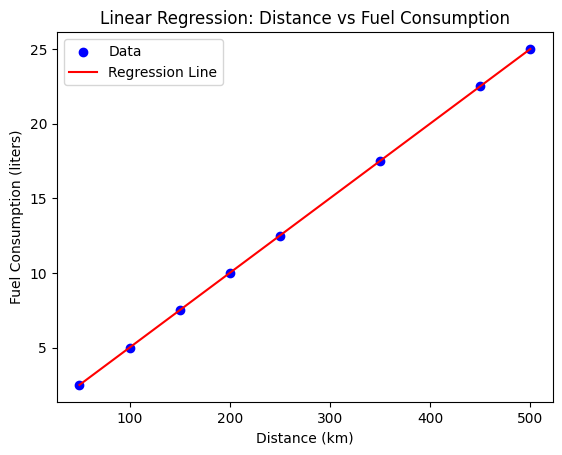

In [11]:
plt.scatter(df["distance_km"], df["fuel_liters"], color="blue", label="Data")  
plt.plot(df["distance_km"], model.predict(X), color="red", label="Regression Line")  
plt.xlabel("Distance (km)")  
plt.ylabel("Fuel Consumption (liters)")  
plt.title("Linear Regression: Distance vs Fuel Consumption")  
plt.legend()  
plt.show()  

In [12]:
model_predict=model.predict([[5]])
actual_value=10
loss=(actual_value-model.predict([[5]]))**2
print(f"{loss}")

[95.0625]


C:\Users\student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
def compute_loss(weight,bias,features,actual_value):
    prediction=weight*features + bias
    return np.mean((actual_value-prediction)**2)

In [23]:
def gradient_descent_step(weight,bias,features,actual_value, leaning_rate=0.0001):
    m = len(features)
    prediction=weight*features + bias
    loss = (actual_value-prediction)**2

    # compute gradients
    gradent_weight = (2/m) * np.sum(loss * features)
    gradent_bias = (2/m) * np.sum(loss)

    weight -= leaning_rate * gradent_weight
    bias -= leaning_rate * gradent_bias
    return weight, bias

In [32]:
np.random.seed(42)
weight = np.random.rand()
bias = np.random.rand()


loss_history =[]
iterations = 70
learning_rate = 0.0001

for _ in range(iterations):
    weight,bias = gradient_descent_step(weight,bias,X,y, learning_rate)
    loss = compute_loss(weight, bias, X,y)
    loss_history.append(loss)

C:\Users\student\AppData\Local\Temp\ipykernel_10580\2319769102.py:3: RuntimeWarning: overflow encountered in square
  return np.mean((actual_value-prediction)**2)
C:\Users\student\AppData\Local\Temp\ipykernel_10580\264517390.py:4: RuntimeWarning: overflow encountered in square
  loss = (actual_value-prediction)**2


In [33]:
print(f"Loss history is {loss_history}")

Loss history is [np.float64(4204454574248.7227), np.float64(6.545303737352381e+29), np.float64(1.5862485265655794e+64), np.float64(9.316527820580405e+132), np.float64(3.2138069983199164e+270), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float

In [30]:
import matplotlib.pyplot as plt

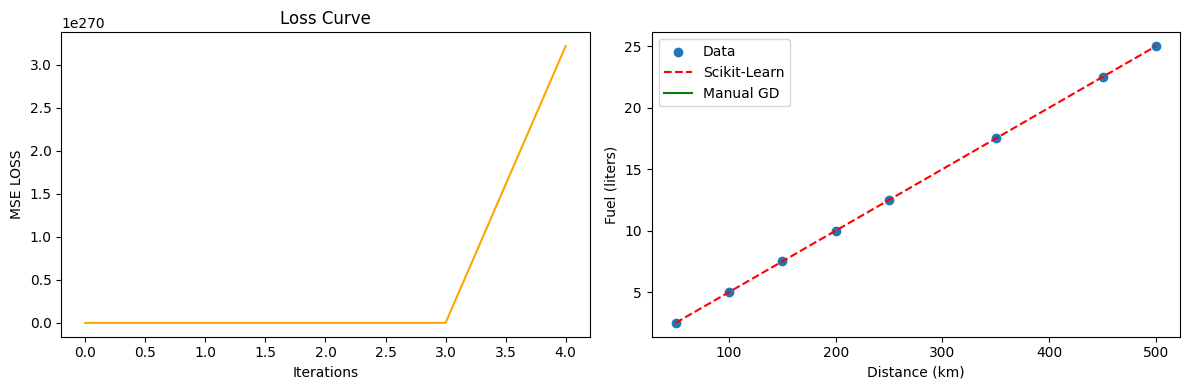

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(iterations), loss_history, color='orange')
plt.title('Loss Curve')
plt.xlabel("Iterations")
plt.ylabel("MSE LOSS")

plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Data")
plt.plot(X, model.predict(X), 'r--', label="Scikit-Learn")
plt.plot(X, weight * X + bias, 'g-', label="Manual GD")
plt.title("")
plt.xlabel("Distance (km)")
plt.ylabel("Fuel (liters)")
plt.legend()

plt.tight_layout()




plt.show()